In [1]:
from collections import defaultdict
import os
import json
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib inline

In [2]:
from road_network.road_and_cars import VoidGenerator, CarManager, RoadManager, speeds, Car
from road_network.prebuild_set import CrossroadAndLines4x4

In [3]:
RED = 20
GREEN = 10
TYPE = "case2"
EPOCHS = 500

x - вниз  
y - вправо

      1  
    2 0 4  
      3

In [4]:
if TYPE == "case1":
    print("Case 1")
    ROTARY_2 = False
    ROTATE_IN_JUNK = False
    RANDOM_WALK = False
elif TYPE == "case2":
    print("Case 2")
    ROTARY_2 = False
    ROTATE_IN_JUNK = False
    RANDOM_WALK = True
elif TYPE == "case3":
    print("Case 3")
    ROTARY_2 = False
    ROTATE_IN_JUNK = True
    RANDOM_WALK = True
elif TYPE == "case4":
    print("Case 4")
    ROTARY_2 = True
    ROTATE_IN_JUNK = False
    RANDOM_WALK = False

Case 2


In [5]:
def initialize_map(red, green, rot_2):
    cross0 = CrossroadAndLines4x4(10, red, green, rotary_2=rot_2, name="BC0")
    cross1 = CrossroadAndLines4x4(10, red, green, rotary_2=rot_2, name="BC1")
    cross2 = CrossroadAndLines4x4(10, red, green, rotary_2=rot_2, name="BC2")
    cross3 = CrossroadAndLines4x4(10, red, green, rotary_2=rot_2, name="BC3")
    void = VoidGenerator(name="Void")
    
    RoadManager.connect_roads_str("BC0/Cross0/Cross0/Line3", "BC2/Cross2/Cross2/LineWLight3")
    RoadManager.connect_roads_str("BC0/Cross0/Cross1/Line3", "BC2/Cross2/Cross3/LineWLight3")
    RoadManager.connect_roads_str("BC0/Cross1/Cross0/Line3", "BC2/Cross3/Cross2/LineWLight3")
    RoadManager.connect_roads_str("BC0/Cross1/Cross1/Line3", "BC2/Cross3/Cross3/LineWLight3")

    RoadManager.connect_roads_str("BC0/Cross0/Cross0/Line0", "BC1/Cross1/Cross1/LineWLight0")
    RoadManager.connect_roads_str("BC0/Cross0/Cross2/Line0", "BC1/Cross1/Cross3/LineWLight0")
    RoadManager.connect_roads_str("BC0/Cross2/Cross0/Line0", "BC1/Cross3/Cross1/LineWLight0") 
    RoadManager.connect_roads_str("BC0/Cross2/Cross2/Line0", "BC1/Cross3/Cross3/LineWLight0")

    RoadManager.connect_roads_str("BC0/Cross1/Cross1/Line1", "BC1/Cross0/Cross0/LineWLight1")
    RoadManager.connect_roads_str("BC0/Cross1/Cross3/Line1", "BC1/Cross0/Cross2/LineWLight1")
    RoadManager.connect_roads_str("BC0/Cross3/Cross1/Line1", "BC1/Cross2/Cross0/LineWLight1")
    RoadManager.connect_roads_str("BC0/Cross3/Cross3/Line1", "BC1/Cross2/Cross2/LineWLight1")

    RoadManager.connect_roads_str("BC0/Cross2/Cross2/Line2", "BC2/Cross0/Cross0/LineWLight2")
    RoadManager.connect_roads_str("BC0/Cross2/Cross3/Line2", "BC2/Cross0/Cross1/LineWLight2")
    RoadManager.connect_roads_str("BC0/Cross3/Cross2/Line2", "BC2/Cross1/Cross0/LineWLight2")
    RoadManager.connect_roads_str("BC0/Cross3/Cross3/Line2", "BC2/Cross1/Cross1/LineWLight2")

    RoadManager.connect_roads_str("BC1/Cross0/Cross0/Line3", "BC3/Cross2/Cross2/LineWLight3")
    RoadManager.connect_roads_str("BC1/Cross0/Cross1/Line3", "BC3/Cross2/Cross3/LineWLight3")
    RoadManager.connect_roads_str("BC1/Cross1/Cross0/Line3", "BC3/Cross3/Cross2/LineWLight3")
    RoadManager.connect_roads_str("BC1/Cross1/Cross1/Line3", "BC3/Cross3/Cross3/LineWLight3")

    RoadManager.connect_roads_str("BC1/Cross1/Cross1/Line1", "BC0/Cross0/Cross0/LineWLight1")
    RoadManager.connect_roads_str("BC1/Cross1/Cross3/Line1", "BC0/Cross0/Cross2/LineWLight1")
    RoadManager.connect_roads_str("BC1/Cross3/Cross1/Line1", "BC0/Cross2/Cross0/LineWLight1")
    RoadManager.connect_roads_str("BC1/Cross3/Cross3/Line1", "BC0/Cross2/Cross2/LineWLight1")

    RoadManager.connect_roads_str("BC1/Cross0/Cross0/Line0", "BC0/Cross1/Cross1/LineWLight0")
    RoadManager.connect_roads_str("BC1/Cross0/Cross2/Line0", "BC0/Cross1/Cross3/LineWLight0")
    RoadManager.connect_roads_str("BC1/Cross2/Cross0/Line0", "BC0/Cross3/Cross1/LineWLight0")
    RoadManager.connect_roads_str("BC1/Cross2/Cross2/Line0", "BC0/Cross3/Cross3/LineWLight0")

    RoadManager.connect_roads_str("BC1/Cross2/Cross2/Line2", "BC3/Cross0/Cross0/LineWLight2")
    RoadManager.connect_roads_str("BC1/Cross2/Cross3/Line2", "BC3/Cross0/Cross1/LineWLight2")
    RoadManager.connect_roads_str("BC1/Cross3/Cross2/Line2", "BC3/Cross1/Cross0/LineWLight2")
    RoadManager.connect_roads_str("BC1/Cross3/Cross3/Line2", "BC3/Cross1/Cross1/LineWLight2")

    RoadManager.connect_roads_str("BC2/Cross0/Cross0/Line0", "BC3/Cross1/Cross1/LineWLight0")
    RoadManager.connect_roads_str("BC2/Cross0/Cross2/Line0", "BC3/Cross1/Cross3/LineWLight0")
    RoadManager.connect_roads_str("BC2/Cross2/Cross0/Line0", "BC3/Cross3/Cross1/LineWLight0")
    RoadManager.connect_roads_str("BC2/Cross2/Cross2/Line0", "BC3/Cross3/Cross3/LineWLight0")

    RoadManager.connect_roads_str("BC2/Cross2/Cross2/Line2", "BC0/Cross0/Cross0/LineWLight2")
    RoadManager.connect_roads_str("BC2/Cross2/Cross3/Line2", "BC0/Cross0/Cross1/LineWLight2")
    RoadManager.connect_roads_str("BC2/Cross3/Cross2/Line2", "BC0/Cross1/Cross0/LineWLight2")
    RoadManager.connect_roads_str("BC2/Cross3/Cross3/Line2", "BC0/Cross1/Cross1/LineWLight2")

    RoadManager.connect_roads_str("BC2/Cross0/Cross0/Line3", "BC0/Cross2/Cross2/LineWLight3")
    RoadManager.connect_roads_str("BC2/Cross0/Cross1/Line3", "BC0/Cross2/Cross3/LineWLight3")
    RoadManager.connect_roads_str("BC2/Cross1/Cross0/Line3", "BC0/Cross3/Cross2/LineWLight3")
    RoadManager.connect_roads_str("BC2/Cross1/Cross1/Line3", "BC0/Cross3/Cross3/LineWLight3")

    RoadManager.connect_roads_str("BC2/Cross1/Cross1/Line1", "BC3/Cross0/Cross0/LineWLight1")
    RoadManager.connect_roads_str("BC2/Cross1/Cross3/Line1", "BC3/Cross0/Cross2/LineWLight1")
    RoadManager.connect_roads_str("BC2/Cross3/Cross1/Line1", "BC3/Cross2/Cross0/LineWLight1")
    RoadManager.connect_roads_str("BC2/Cross3/Cross3/Line1", "BC3/Cross2/Cross2/LineWLight1")

    RoadManager.connect_roads_str("BC3/Cross1/Cross1/Line1", "BC2/Cross0/Cross0/LineWLight1")
    RoadManager.connect_roads_str("BC3/Cross1/Cross3/Line1", "BC2/Cross0/Cross2/LineWLight1")
    RoadManager.connect_roads_str("BC3/Cross3/Cross1/Line1", "BC2/Cross2/Cross0/LineWLight1")
    RoadManager.connect_roads_str("BC3/Cross3/Cross3/Line1", "BC2/Cross2/Cross2/LineWLight1")

    RoadManager.connect_roads_str("BC3/Cross2/Cross2/Line2", "BC1/Cross0/Cross0/LineWLight2")
    RoadManager.connect_roads_str("BC3/Cross2/Cross3/Line2", "BC1/Cross0/Cross1/LineWLight2")
    RoadManager.connect_roads_str("BC3/Cross3/Cross2/Line2", "BC1/Cross1/Cross0/LineWLight2")
    RoadManager.connect_roads_str("BC3/Cross3/Cross3/Line2", "BC1/Cross1/Cross1/LineWLight2")

    RoadManager.connect_roads_str("BC3/Cross0/Cross0/Line3", "BC1/Cross2/Cross2/LineWLight3")
    RoadManager.connect_roads_str("BC3/Cross0/Cross1/Line3", "BC1/Cross2/Cross3/LineWLight3")
    RoadManager.connect_roads_str("BC3/Cross1/Cross0/Line3", "BC1/Cross3/Cross2/LineWLight3")
    RoadManager.connect_roads_str("BC3/Cross1/Cross1/Line3", "BC1/Cross3/Cross3/LineWLight3")

    RoadManager.connect_roads_str("BC3/Cross0/Cross0/Line0", "BC2/Cross1/Cross1/LineWLight0")
    RoadManager.connect_roads_str("BC3/Cross0/Cross2/Line0", "BC2/Cross1/Cross3/LineWLight0")
    RoadManager.connect_roads_str("BC3/Cross2/Cross0/Line0", "BC2/Cross3/Cross1/LineWLight0")
    RoadManager.connect_roads_str("BC3/Cross2/Cross2/Line0", "BC2/Cross3/Cross3/LineWLight0")

In [6]:
def delete_map():
    RoadManager.dict_road = {}
    for road in RoadManager.roads:
        del road
    RoadManager.roads = []
    for car in CarManager.all_cars:
        del car
    CarManager.all_cars = [None]

In [7]:
def load_cars(fname):
    with open(fname) as fp:
        cars = json.load(fp)
    for road, c in cars.items():
        crs = []
        for char in c:
            if RANDOM_WALK:
                route = np.random.randint(0, 4, 100).tolist()
            crs.append(Car(route=route, rotate_in_case=ROTATE_IN_JUNK))
            crs[-1].set_position(np.array(char[:2]))
            crs[-1].set_speed(char[2])
        RoadManager.dict_road[road].add_car_at_position_w_speed(crs)

In [8]:
delete_map()

In [9]:
wholeresults = []
for file in os.listdir("initials")[:-1]:
    initialize_map(RED, GREEN, ROTARY_2)
    load_cars(os.path.join("initials", file))
    for frame in tqdm(range(EPOCHS), total=EPOCHS):
        for road in RoadManager.roads:
            road.move_cars(frame)

        for road in RoadManager.roads:
            road.step(frame)

        for road in RoadManager.roads:
            road.process_outputs()
    
    results = np.zeros((EPOCHS, 3), dtype="float32")
    for road in RoadManager.roads:
        results += np.array(road.get_stats())
    delete_map()
        
    density = results[:, 1]/results[:, 0]
    speed = results[:, 2]/results[:, 1]
    speed[np.isnan(speed)] = 0
    flow = speed*density
    wholeresults.append((np.mean(density), np.mean(speed), np.mean(flow)))

100%|██████████| 500/500 [00:29<00:00,  6.78it/s]
/home/admitri/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
100%|██████████| 500/500 [04:18<00:00,  1.20it/s]


In [10]:
wholeresults.append((1, 0, 0))

In [11]:
density_speed_flow = np.array(wholeresults)

In [12]:
density_speed_flow

array([[0.        , 0.        , 0.        ],
       [0.03804348, 0.70601344, 0.0268592 ],
       [0.08865488, 0.67888319, 0.06018631],
       [0.13943613, 0.63730091, 0.08886277],
       [0.18902852, 0.57887965, 0.10942476],
       [0.23930027, 0.23627894, 0.05654161],
       [0.28787366, 0.13966373, 0.0402055 ],
       [0.33848506, 0.08166333, 0.02764182],
       [0.38807744, 0.07896805, 0.03064572],
       [0.43783966, 0.05517844, 0.02415931],
       [0.48777181, 0.03847284, 0.01876596],
       [0.53753394, 0.0365744 , 0.01965998],
       [0.58763593, 0.02787196, 0.01637857],
       [0.65640688, 0.02216477, 0.01450713],
       [0.6952306 , 0.01872481, 0.01296518],
       [0.76717454, 0.01239365, 0.00947215],
       [0.80809307, 0.00997789, 0.00803465],
       [0.86378872, 0.00754048, 0.0065034 ],
       [0.90698427, 0.00492739, 0.00446535],
       [0.95250356, 0.00388458, 0.00369667],
       [1.        , 0.        , 0.        ]])

In [13]:
np.save(os.path.join("data", "%s_modeling.npy" % TYPE), density_speed_flow)

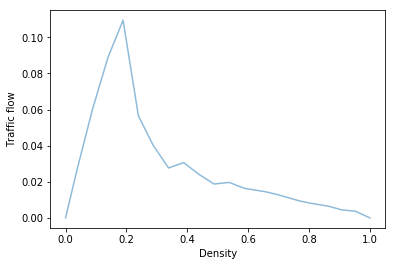

In [14]:
plt.plot(density_speed_flow[:, 0], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Traffic flow")
plt.savefig(os.path.join("data", "%s_density_flow.png" % TYPE))

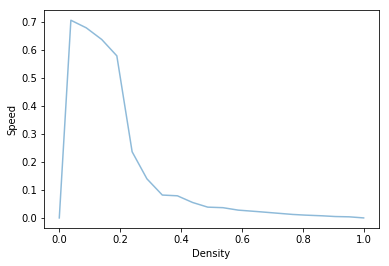

In [15]:
plt.plot(density_speed_flow[:, 0], density_speed_flow[:, 1], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Speed")
plt.savefig(os.path.join("data", "%s_density_speed.png" % TYPE))

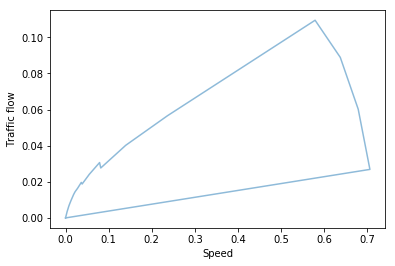

In [16]:
plt.plot(density_speed_flow[:, 1], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Speed")
plt.ylabel("Traffic flow")
plt.savefig(os.path.join("data", "%s_speed_flow.png" % TYPE))